# **Wholesale Customer Dataset**  

**Siobhan Barrett 10340002**

My dataset is the Wholesale Customer dataset from UCI Machine Learning Repository. It shows the annual spend in monetary units on various product categories by the customers of a wholesale dsitributor in Portugal.  

The dataset consists of the following 8 attributes:   
- **Channel** - HoReCA/Retail - value in file 1/2 (where HoReCa is Hotel/Restaurant/Cafe)  
- **Region** - Lisbon/Oporto/Other - values in file 1/2/3  
- **Fresh** - annual spend on fresh products  
- **Milk** - annual spend on milk products    
- **Grocery** - annual spending on grocery products    
- **Frozen** - annual spending on frozen products  
- **Detergents_Paper** - annual spending on detergents and paper products  
- **Delicatessen** - annual spending on delicatessen products  

First I will import libraries, import the dataset and look at some basic information about the data.

In [281]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# Import file and set data types of Channel and Region to string
wholesale = pd.read_csv("C:/Users/barre/Documents/DBS/Advanced Data Analytics/CA1/Wholesale customers data.csv", 
                        dtype={'Channel': np.str, 'Region': np.str})

In [282]:
# Look at first 5 rows
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [283]:
# View information about the data types and how many records in each column - shows there are no missing values
wholesale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null object
Region              440 non-null object
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(6), object(2)
memory usage: 27.6+ KB


In [284]:
# Shows summary statistics for numerical variables
wholesale.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Question 4 - Summary Statistics for 2 attributes**   
I have calculated the summary statistics using the built in describe function for Grocery Sales and Fresh Produce Sales. I then used the mean, std and median functions separately for Fresh Produce.

In [285]:
# Calculate summary statistics for each of 2 attributes
print 'Grocery summary statistics:\n', wholesale['Grocery'].describe()
print '\n'
print 'Fresh summary statistics:\n', wholesale['Fresh'].describe()
print '\n'
print 'Mean, Standard Deviation and Median for Fresh Produce Sales:'
print 'Mean of Fresh Produce Sales:', wholesale['Fresh'].mean()
print 'Standard Deviation of Fresh Produce Sales:', wholesale['Fresh'].std()
print 'Median of Fresh Produce Sales:', wholesale['Fresh'].median()

Grocery summary statistics:
count      440.000000
mean      7951.277273
std       9503.162829
min          3.000000
25%       2153.000000
50%       4755.500000
75%      10655.750000
max      92780.000000
Name: Grocery, dtype: float64


Fresh summary statistics:
count       440.000000
mean      12000.297727
std       12647.328865
min           3.000000
25%        3127.750000
50%        8504.000000
75%       16933.750000
max      112151.000000
Name: Fresh, dtype: float64


Mean, Standard Deviation and Median for Fresh Produce Sales:
Mean of Fresh Produce Sales: 12000.2977273
Standard Deviation of Fresh Produce Sales: 12647.3288651
Median of Fresh Produce Sales: 8504.0


1    298
2    142
Name: Channel, dtype: int64

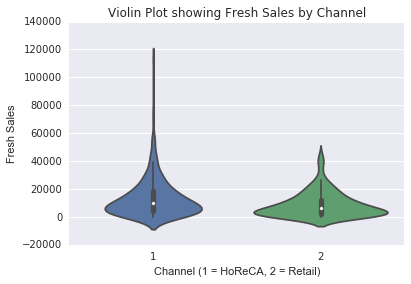

In [286]:
# Violin plot of Delicatessen Sales by Channel - shows that channel 1 HoReCa has large outliers while 2 Retail does not
vplots = sns.violinplot(x='Channel', y='Fresh', data = wholesale)
vplots.set_title('Violin Plot showing Fresh Sales by Channel')
vplots.set_xlabel('Channel (1 = HoReCA, 2 = Retail)')
vplots.set_ylabel('Fresh Sales')
wholesale['Channel'].value_counts()

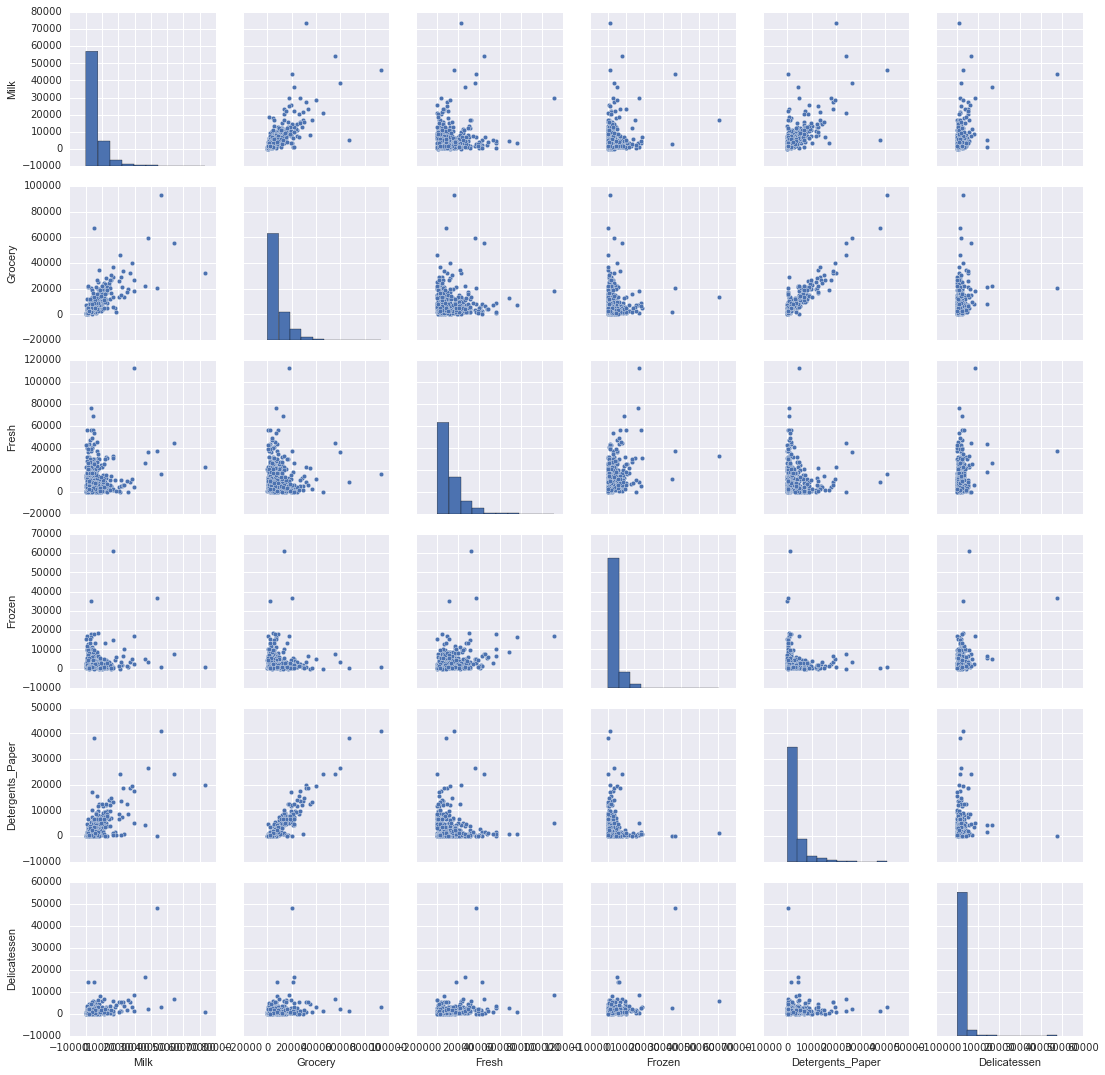

In [287]:
# Use pairplot to see scatter plots of all numerical attributes
sns.pairplot(data = wholesale, vars = ['Milk', 'Grocery', 'Fresh', 'Frozen', 'Detergents_Paper', 'Delicatessen'])

**Question 3 - Scatter Plot of 2 Variables**  
From the pairplot above I picked the attributes which looked most correlated - Detergents_Paper and Grocery. I created a scatter plot using matplotlib. I used corrcoef to calculate the correlation coefficient as 0.92 showing they have a very strong positive correlation.

array([[ 1.        ,  0.92464069],
       [ 0.92464069,  1.        ]])

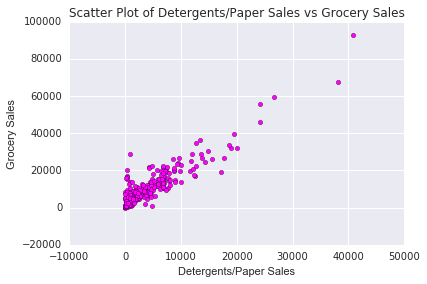

In [288]:
# Scatter plot of Detergents_Paper and Grocery - shows a strong positive correlation
scatter = wholesale.plot(kind ='scatter', x='Detergents_Paper', y='Grocery', color = 'magenta')
scatter.set_title('Scatter Plot of Detergents/Paper Sales vs Grocery Sales')
scatter.set_xlabel('Detergents/Paper Sales')
scatter.set_ylabel('Grocery Sales')
# Calculate correlation coefficient
np.corrcoef(wholesale['Detergents_Paper'], wholesale['Grocery'])

**Question 5 - Histogram**  
I used a histogram to display Fresh Sales distribution. I tried a few different values for bins starting with 20 (around square root of number of records) and settled on 50.

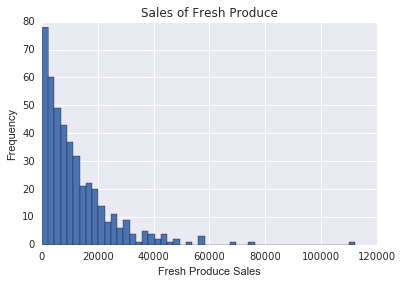

In [289]:
# Taking numerical attribute 'Fresh', binning it and plotting as a histogram
fresh_hist = wholesale['Fresh'].plot(kind = 'hist', bins = 50)
fresh_hist.set_title('Sales of Fresh Produce')
fresh_hist.set_xlabel('Fresh Produce Sales')
fresh_hist.set_ylabel('Frequency')

**Question 2 - Bar Chart and Line Chart**  
My data set doesn't really lend itself to very interesting line charts - it would be much better if it had dates to plot against. I decided to plot my bar chart and line chart of the total sales for each product category.  

In [290]:
# Calculate total sales for each product category by summing each numerical column and then sorting the result in descending
# order
cat_sales = wholesale.select_dtypes(include=[np.number]).sum().sort_values(ascending = False)
cat_sales

Fresh               5280131
Grocery             3498562
Milk                2550357
Frozen              1351650
Detergents_Paper    1267857
Delicatessen         670943
dtype: int64

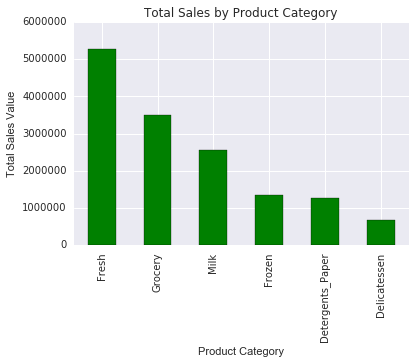

In [291]:
# Plot a bar chart of total sales by product category
sales_bar = cat_sales.plot(kind = 'bar', color='green')
sales_bar.set_title('Total Sales by Product Category')
sales_bar.set_xlabel('Product Category')
sales_bar.set_ylabel('Total Sales Value')

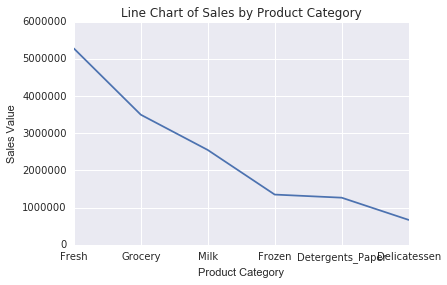

In [292]:
# Line chart showing total sale by category
sales_line = cat_sales.plot()
sales_line.set_title('Line Chart of Sales by Product Category')
sales_line.set_xlabel('Product Category')
sales_line.set_ylabel('Sales Value')

I created a second line chart as my first shows the same information as the bar chart.

In [293]:
# Group values by Region and sum to see total sales
summed = wholesale.groupby('Region').sum()
summed

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
1,854833,422454,570037,231026,204136,104327
2,464721,239144,433274,190132,173311,54506
3,3960577,1888759,2495251,930492,890410,512110


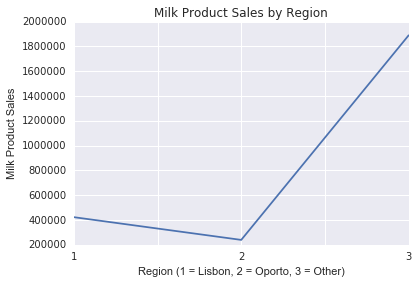

In [294]:
# Line chart of Detergents/Paper Sales by Region
linechart = summed['Milk'].plot()
linechart.set_title('Milk Product Sales by Region')
linechart.set_xlabel('Region (1 = Lisbon, 2 = Oporto, 3 = Other)')
linechart.set_ylabel('Milk Product Sales')